         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
Index(['X1', 'X2', 'X3', 'Y'], dtype='object')


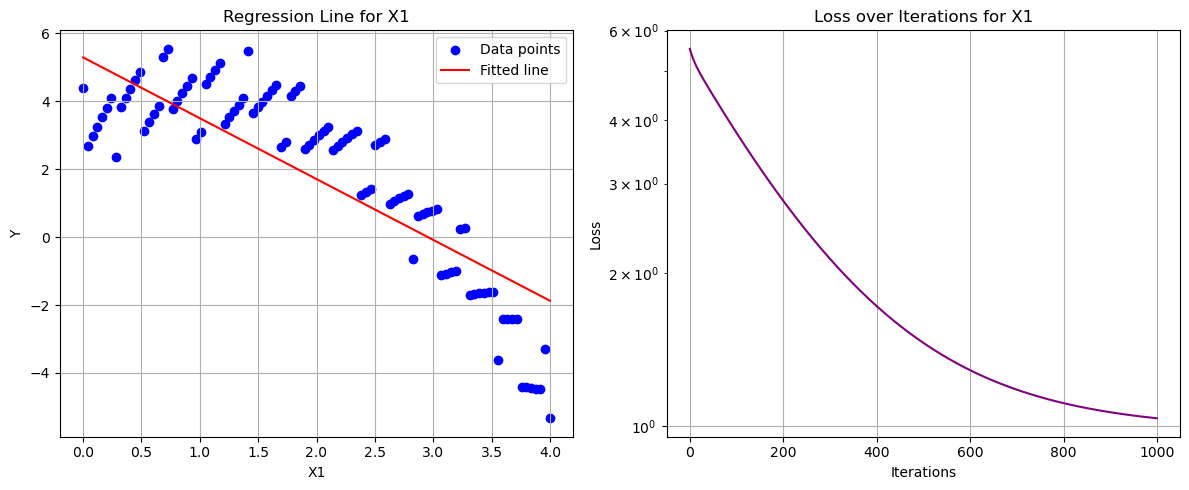

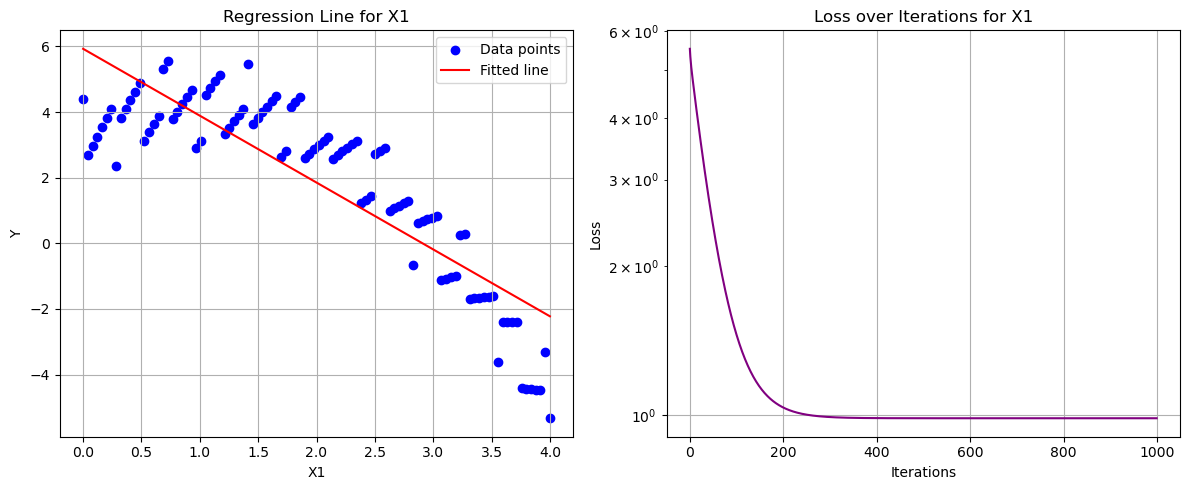

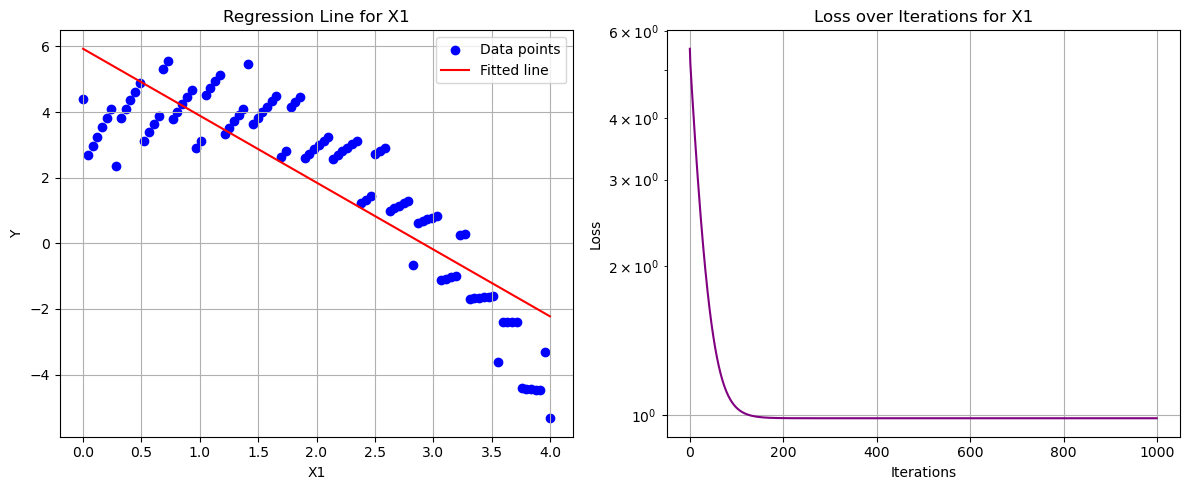

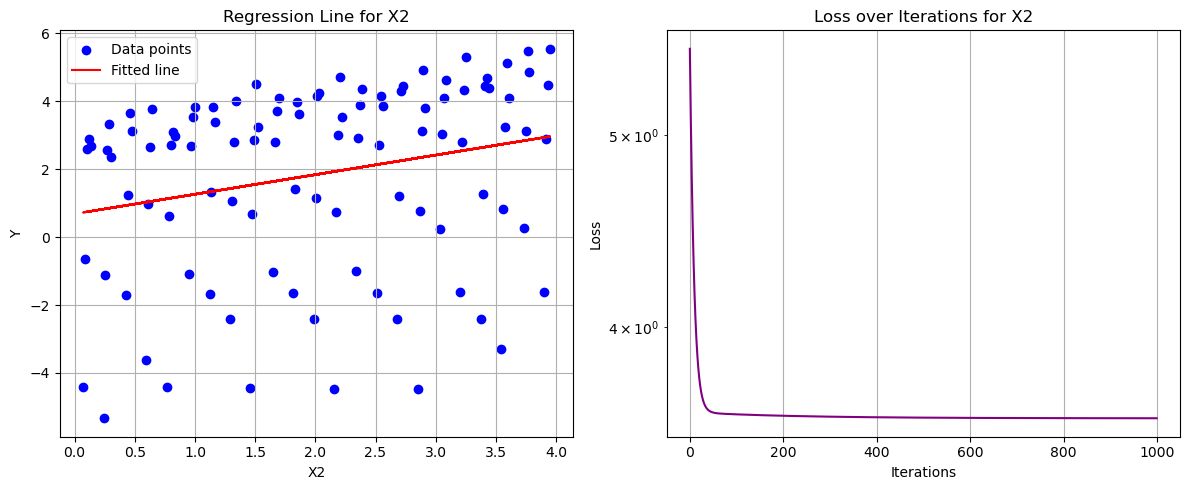

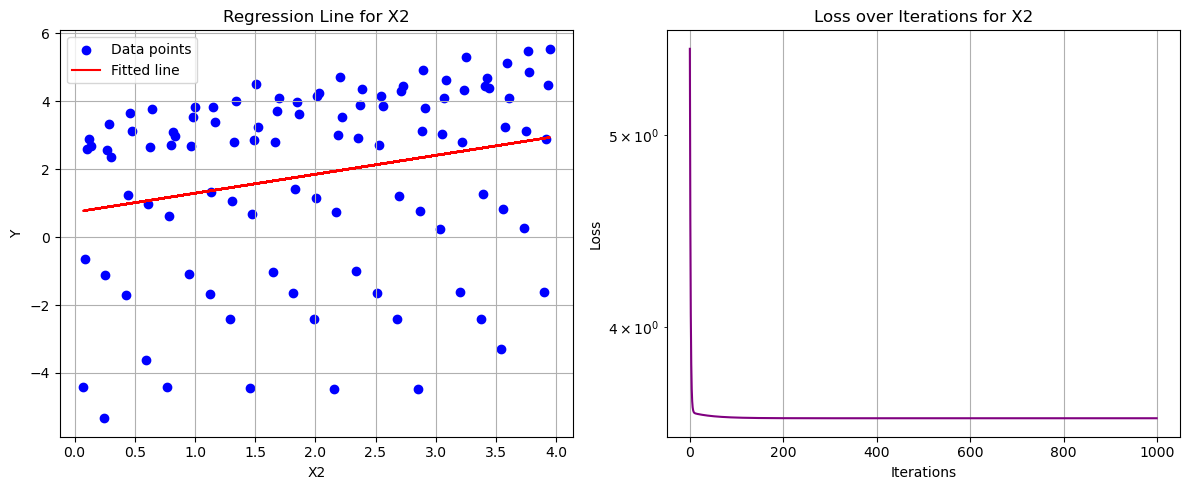

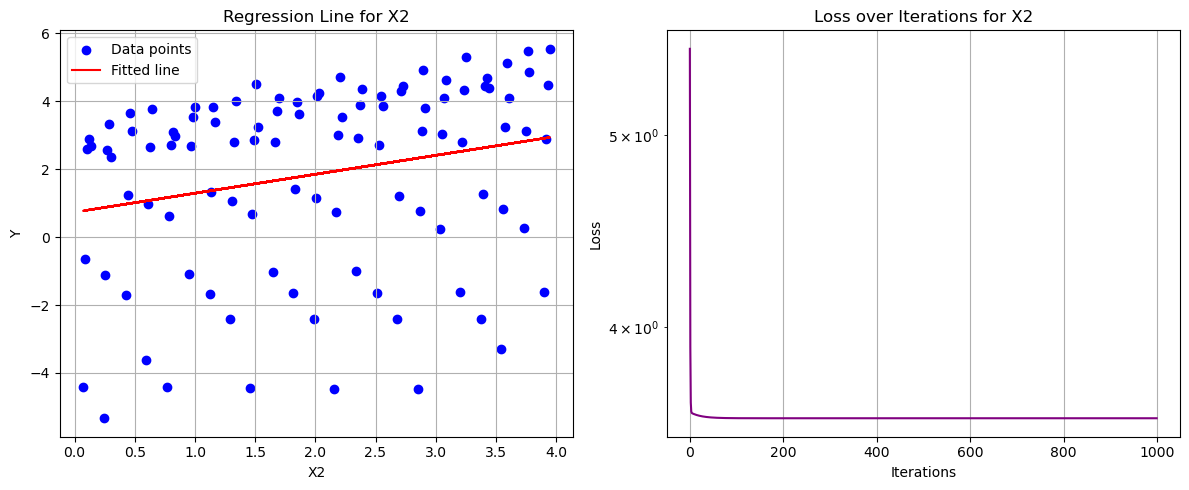

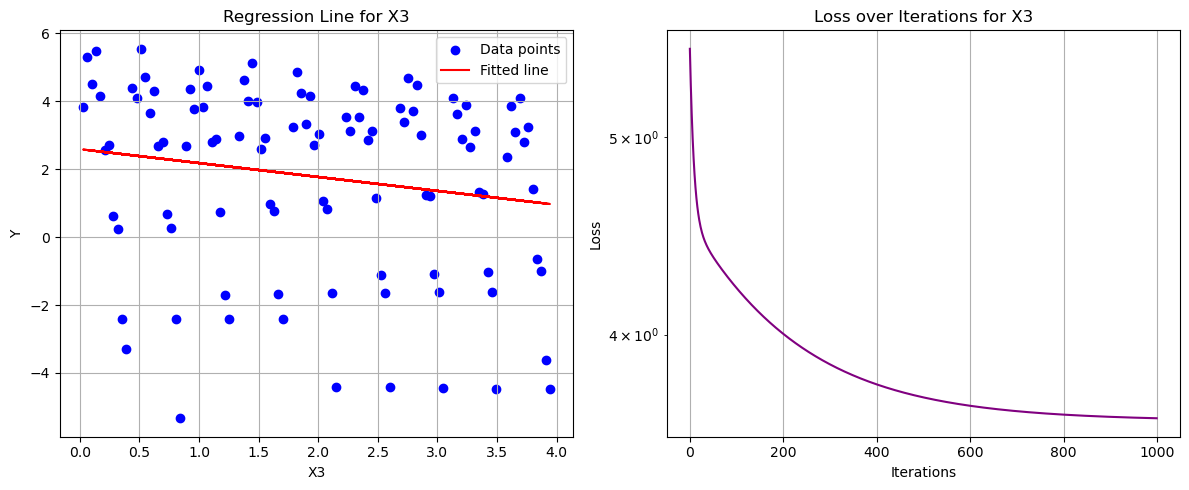

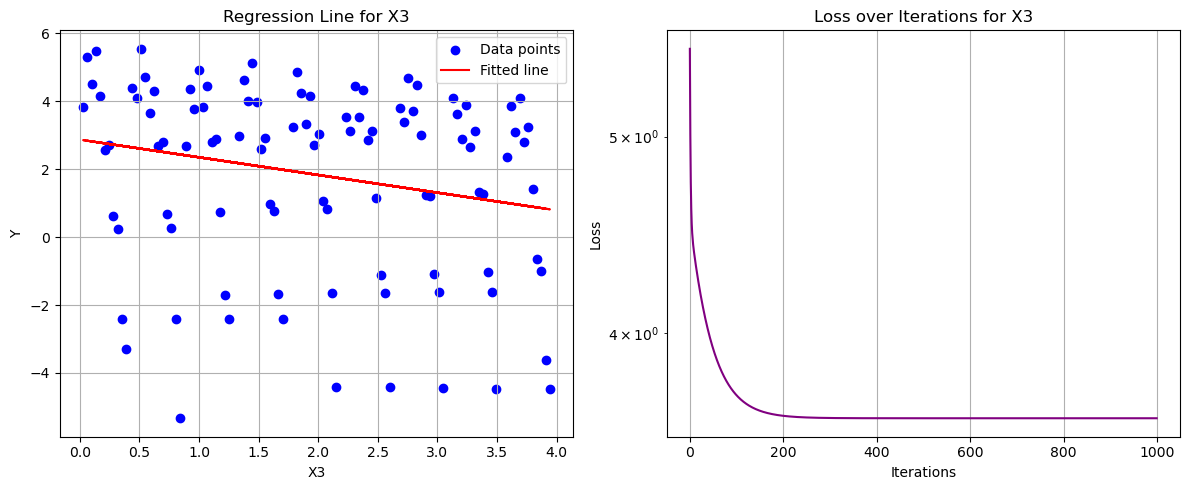

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'C:\\Users\\gpric\\Downloads/HW1.csv'
df = pd.read_csv(data_path)

# Display the first five rows of the dataset
print(df.head())
print(df.columns)

# Gradient Descent
def gradient_descent(X, Y, learning_rate=0.01, iterations=1000):
    m = len(Y)
    theta0 = 0
    theta1 = 0
    cost_history = []

    for _ in range(iterations):
        # Predictions
        y_pred = theta0 + theta1 * X

        # Cost
        cost = (1/(2*m)) * np.sum((y_pred - Y) ** 2)
        cost_history.append(cost)

        # Gradients
        d_theta0 = (1/m) * np.sum(y_pred - Y)
        d_theta1 = (1/m) * np.sum((y_pred - Y) * X)

        # Update parameters
        theta0 -= learning_rate * d_theta0
        theta1 -= learning_rate * d_theta1

    return theta0, theta1, cost_history

# Plotting function
def plot_results(X, Y, theta0, theta1, cost_history, variable_name):
    plt.figure(figsize=(12, 5))

    # Plot regression
    plt.subplot(1, 2, 1)
    plt.grid(True)
    plt.scatter(X, Y, color='blue', label='Data points')
    plt.plot(X, theta0 + theta1 * X, color='red', label='Fitted line')
    plt.title(f'Regression Line for {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

    # Plot cost
    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.plot(range(len(cost_history)), cost_history, color='purple')
    plt.title(f'Loss over Iterations for {variable_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.yscale('log')

    plt.tight_layout()
    plt.show()

# Parameters for the model
learning_rates = [0.01, 0.05, 0.1]
iterations = 1000

# Run gradient descent for X1
results_X1 = []
for lr in learning_rates:
    theta0, theta1, cost_history = gradient_descent(data['X1'], data['Y'], learning_rate=lr, iterations=iterations)
    results_X1.append((theta0, theta1, cost_history, lr))
    plot_results(data['X1'], data['Y'], theta0, theta1, cost_history, 'X1')

# Run gradient descent for X2
results_X2 = []
for lr in learning_rates:
    theta0, theta1, cost_history = gradient_descent(data['X2'], data['Y'], learning_rate=lr, iterations=iterations)
    results_X2.append((theta0, theta1, cost_history, lr))
    plot_results(data['X2'], data['Y'], theta0, theta1, cost_history, 'X2')

# Run gradient descent for X3
results_X3 = []
for lr in learning_rates:
    theta0, theta1, cost_history = gradient_descent(data['X3'], data['Y'], learning_rate=lr, iterations=iterations)
    results_X3.append((theta0, theta1, cost_history, lr))
    plot_results(data['X3'], data['Y'], theta0, theta1, cost_history, 'X3')

# Extracting the minimum loss for each variable at learning rate 0.05 (index 1 for each result)
min_loss_X1 = min(results_X1[1][2])
min_loss_X2 = min(results_X2[1][2])
min_loss_X3 = min(results_X3[1][2])

print(f"Minimum loss for X1: {min_loss_X1}")
print(f"Minimum loss for X2: {min_loss_X2}")
print(f"Minimum loss for X3: {min_loss_X3}")



Final linear model: Y = 3.399297051267627 + -1.7332058216404478 * X1 + 0.8489827451594736 * X2 + 0.015073697283572666 * X3
Final cost: 0.9337836009440804


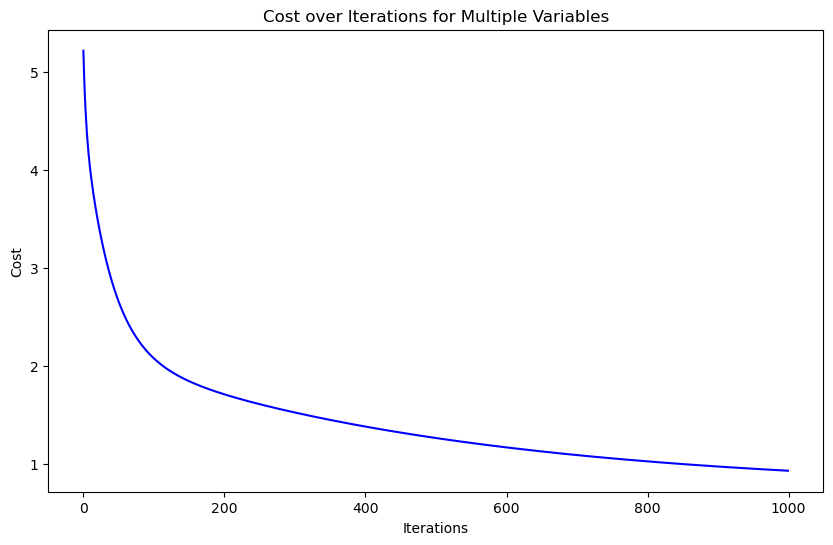

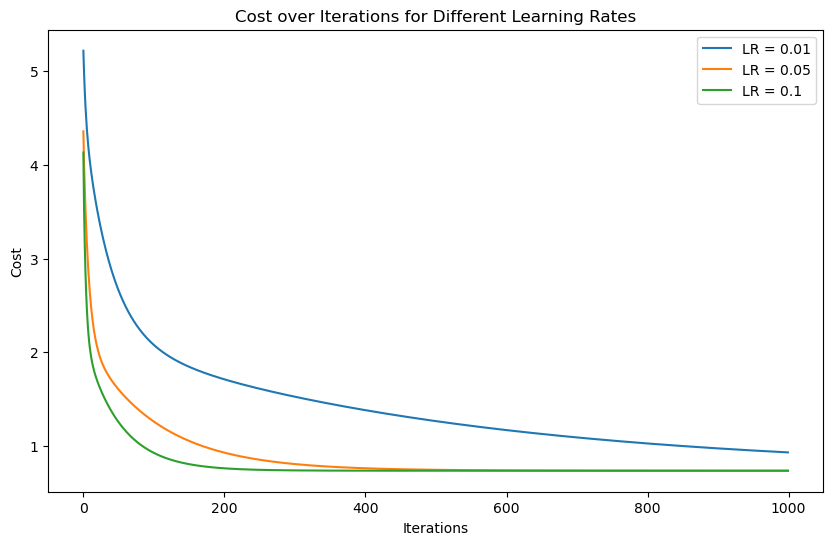

Impact of different learning rates on the final loss and number of training iterations:
Learning rate 0.01: Final cost = 0.9337836009440804, Iterations taken = 1000
Learning rate 0.05: Final cost = 0.7385298570293829, Iterations taken = 1000
Learning rate 0.1: Final cost = 0.7384642444206544, Iterations taken = 1000
Prediction for [1 1 1]: 2.530147672070225
Prediction for [2 0 4]: -0.006819802878978085
Prediction for [3 2 1]: -0.08728122605119637


In [2]:
# Multi-variable linear regression using gradient descent
def gradient_descent_multi(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        theta = theta - (learning_rate/m) * np.dot(X.T, (np.dot(X, theta) - y))
        cost = (1/(2*m)) * np.sum((np.dot(X, theta) - y) ** 2)
        cost_history.append(cost)
    
    return theta, cost_history

# Prepare data
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values
X = np.insert(X, 0, 1, axis=1)  # Add intercept term
theta = np.zeros(X.shape[1])

# Set learning rate and iterations
learning_rate = 0.01
iterations = 1000

# Run gradient descent for multiple variables
theta, cost_history = gradient_descent_multi(X, y, theta, learning_rate, iterations)

# Print the final linear model and cost
print(f'Final linear model: Y = {theta[0]} + {theta[1]} * X1 + {theta[2]} * X2 + {theta[3]} * X3')
print(f'Final cost: {cost_history[-1]}')

# Plot cost over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations for Multiple Variables')
plt.show()

# Evaluate impact of different learning rates
theta_learning_rates = []
cost_learning_rates = []

for lr in learning_rates:
    theta_lr, cost_lr = gradient_descent_multi(X, y, np.zeros(X.shape[1]), lr, iterations)
    theta_learning_rates.append(theta_lr)
    cost_learning_rates.append(cost_lr)

# Plot cost over iterations for different learning rates
plt.figure(figsize=(10, 6))

for i, lr in enumerate(learning_rates):
    plt.plot(range(iterations), cost_learning_rates[i], label=f'LR = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations for Different Learning Rates')
plt.legend()
plt.show()

# Print impact of different learning rates on the final loss
print("Impact of different learning rates on the final loss and number of training iterations:")
for i, lr in enumerate(learning_rates):
    print(f"Learning rate {lr}: Final cost = {cost_learning_rates[i][-1]}, Iterations taken = {iterations}")

# Make predictions for new values
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values_b = np.c_[np.ones((new_values.shape[0], 1)), new_values]
predictions = np.dot(new_values_b, theta)

for i, new_val in enumerate(new_values):
    print(f"Prediction for {new_val}: {predictions[i]}")